# Working with personal data requests


In [257]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns

# Part 1

In [115]:
# Your code here
df = pd.read_json("StreamingHistory1.json")
df.head(5)

,endTime,artistName,trackName,msPlayed
0,2022-06-06 10:39,Jazmine Sullivan,Bust Your Windows,266306
1,2022-06-06 10:43,Big Sean,Beware,235186
2,2022-06-06 10:46,Pop Smoke,Got It On Me,164579
3,2022-06-06 10:49,Pop Smoke,30 (feat. Bizzy Banks),228251
4,2022-06-06 10:52,Jon Bellion,Stupid Deep,178176


In [62]:
timestamps = df.endTime 
timestamps.head(10)

0    2022-06-06 10:39
1    2022-06-06 10:43
2    2022-06-06 10:46
3    2022-06-06 10:49
4    2022-06-06 10:52
5    2022-06-06 10:57
6    2022-06-06 10:58
7    2022-06-06 10:59
8    2022-06-06 10:59
9    2022-06-06 11:03
Name: endTime, dtype: object

In [50]:
# At the end, make sure you export your dataframe (containing timestamps) using .to_csv
# df.to_csv("filename.csv")


# Part 2 

In [51]:
chetima = pd.read_csv("chetima-timestamps.csv")
chetima.head(5)

,Unnamed: 0,time
0,0,2023-04-19T22:04:48.331Z
1,1,2023-04-19T21:59:00.004Z
2,2,2023-04-19T21:58:37.669Z
3,3,2023-04-19T21:58:25.254Z
4,4,2023-04-19T03:35:12.207Z


In [52]:
chetima = chetima.sort_values(by='time', ascending = True)
chetima.head(10)

,Unnamed: 0,time
19970,19970,2019-04-07T12:30:57.931Z
19969,19969,2019-04-07T21:18:22.625Z
19968,19968,2019-04-07T21:27:52.689Z
19967,19967,2019-04-09T21:34:21.036Z
19966,19966,2019-04-10T12:00:53.076Z
19965,19965,2019-04-13T16:03:42.789Z
19964,19964,2019-04-13T22:26:12.348Z
19963,19963,2019-04-13T22:27:07.778Z
19962,19962,2019-04-13T22:30:38.591Z
19961,19961,2019-04-13T22:35:46.208Z


In [53]:
chetima.drop(columns = "Unnamed: 0", inplace = True)


In [63]:
chetima.head(5)

,time,time_delta
19970,2019-04-07 12:30:57.931000+00:00,NaT
19969,2019-04-07 21:18:22.625000+00:00,0 days 08:47:24.694000
19968,2019-04-07 21:27:52.689000+00:00,0 days 00:09:30.064000
19967,2019-04-09 21:34:21.036000+00:00,2 days 00:06:28.347000
19966,2019-04-10 12:00:53.076000+00:00,0 days 14:26:32.040000


In [55]:
chetima.time = pd.to_datetime(chetima.time, errors="ignore")

In [56]:
chetima.head(5)

,time
19970,2019-04-07 12:30:57.931000+00:00
19969,2019-04-07 21:18:22.625000+00:00
19968,2019-04-07 21:27:52.689000+00:00
19967,2019-04-09 21:34:21.036000+00:00
19966,2019-04-10 12:00:53.076000+00:00


In [57]:
chetima["time_delta"] = chetima.time.diff()

In [64]:
chetima.head(5)

,time,time_delta
19970,2019-04-07 12:30:57.931000+00:00,NaT
19969,2019-04-07 21:18:22.625000+00:00,0 days 08:47:24.694000
19968,2019-04-07 21:27:52.689000+00:00,0 days 00:09:30.064000
19967,2019-04-09 21:34:21.036000+00:00,2 days 00:06:28.347000
19966,2019-04-10 12:00:53.076000+00:00,0 days 14:26:32.040000


In [61]:
chetima.time_delta.describe()

count                        19970
mean     0 days 01:46:14.643485227
std      0 days 08:49:36.550994119
min         0 days 00:00:00.139000
25%         0 days 00:01:10.652750
50%         0 days 00:04:45.097000
75%         0 days 00:20:33.384750
max        15 days 00:34:23.244000
Name: time_delta, dtype: object

### Part 2.3
The longest time between timestamps is roughly 15 days  and the average is 1 hr 46 mins and 14 secs. 

In [99]:
# Because the data is accross three years, I had to index using both year and dayofyear so that I could an accurate 
#count of the day with the most timestamps. First I get the year with the most timestamps and then I get the day
# with the most time stamps in that year. 
chetima["day"] = chetima.time.dt.dayofyear
chetima["year"] = chetima.time.dt.year

In [100]:
chetima.head(10)

,time,time_delta,day,year
19970,2019-04-07 12:30:57.931000+00:00,NaT,97,2019
19969,2019-04-07 21:18:22.625000+00:00,0 days 08:47:24.694000,97,2019
19968,2019-04-07 21:27:52.689000+00:00,0 days 00:09:30.064000,97,2019
19967,2019-04-09 21:34:21.036000+00:00,2 days 00:06:28.347000,99,2019
19966,2019-04-10 12:00:53.076000+00:00,0 days 14:26:32.040000,100,2019
19965,2019-04-13 16:03:42.789000+00:00,3 days 04:02:49.713000,103,2019
19964,2019-04-13 22:26:12.348000+00:00,0 days 06:22:29.559000,103,2019
19963,2019-04-13 22:27:07.778000+00:00,0 days 00:00:55.430000,103,2019
19962,2019-04-13 22:30:38.591000+00:00,0 days 00:03:30.813000,103,2019
19961,2019-04-13 22:35:46.208000+00:00,0 days 00:05:07.617000,103,2019


In [104]:
chetima.year.value_counts()

2022    7930
2023    4808
2019    2818
2021    2640
2020    1775
Name: year, dtype: int64

In [106]:
year_2022 = chetima[chetima.year == 2022]
year_2022.head(10)

,time,time_delta,day,year
12737,2022-01-01 00:02:44.622000+00:00,0 days 00:18:41.056000,1,2022
12736,2022-01-01 01:56:10.539000+00:00,0 days 01:53:25.917000,1,2022
12735,2022-01-01 02:04:08.698000+00:00,0 days 00:07:58.159000,1,2022
12734,2022-01-01 02:05:59.573000+00:00,0 days 00:01:50.875000,1,2022
12733,2022-01-01 05:47:40.521000+00:00,0 days 03:41:40.948000,1,2022
12732,2022-01-01 05:48:23.328000+00:00,0 days 00:00:42.807000,1,2022
12731,2022-01-01 05:48:24.203000+00:00,0 days 00:00:00.875000,1,2022
12730,2022-01-01 05:48:25.871000+00:00,0 days 00:00:01.668000,1,2022
12729,2022-01-01 05:48:56.486000+00:00,0 days 00:00:30.615000,1,2022
12728,2022-01-01 05:49:32.942000+00:00,0 days 00:00:36.456000,1,2022


In [107]:
year_2022.day.value_counts()

362    74
87     72
365    66
67     65
128    64
       ..
165     2
224     2
244     1
247     1
233     1
Name: day, Length: 349, dtype: int64

In [110]:
year_2022[year_2022.day == 74].head(5)

,time,time_delta,day,year
10770,2022-03-15 00:19:13.287000+00:00,0 days 01:49:12.705000,74,2022
10769,2022-03-15 00:54:29.270000+00:00,0 days 00:35:15.983000,74,2022
10768,2022-03-15 01:00:37.962000+00:00,0 days 00:06:08.692000,74,2022
10767,2022-03-15 02:51:27.411000+00:00,0 days 01:50:49.449000,74,2022
10766,2022-03-15 02:52:21.392000+00:00,0 days 00:00:53.981000,74,2022


### Part 2.4
The 15th of March 2022 had the most timestamps. 

In [111]:
year_2022["month"] = year_2022.time.dt.month

/var/folders/fs/6f75xcpx5fb_m71xj8kvjm880000gn/T/ipykernel_47480/539652368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022["month"] = year_2022.time.dt.month


In [113]:
year_2022.month.value_counts()

3     1032
4      914
5      894
2      854
12     741
10     735
1      621
11     567
7      454
8      436
6      357
9      325
Name: month, dtype: int64

### Part 2.5
The month of March in 2022 had 1032 timestamps which is the most in all three years

### Part 2.6

Based on the average time between each timestamp which is almost 2 hrs I think thes source of this data is a video streaming platform like youtube or netflix. Also the day/month with the most time stamps coincides with spring break in 2022 which makes me think its probably netflix or a similar service becuase its common to catch up on tv shows over holiday breaks.

# Part 3 

In [144]:
import matplotlib.pyplot as plt

In [142]:
chetima_2022 = year_2022
chetima_2022.head(5)

,time,time_delta,day,year,month
12737,2022-01-01 00:02:44.622000+00:00,0 days 00:18:41.056000,1,2022,1
12736,2022-01-01 01:56:10.539000+00:00,0 days 01:53:25.917000,1,2022,1
12735,2022-01-01 02:04:08.698000+00:00,0 days 00:07:58.159000,1,2022,1
12734,2022-01-01 02:05:59.573000+00:00,0 days 00:01:50.875000,1,2022,1
12733,2022-01-01 05:47:40.521000+00:00,0 days 03:41:40.948000,1,2022,1


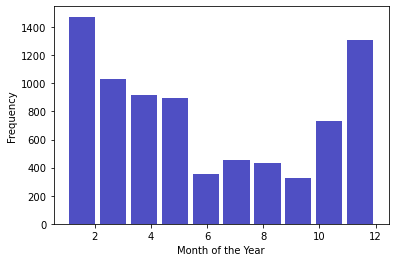

In [161]:
plt.hist(chetima_2022.month, bins = 10, color = "#0504aa", alpha = 0.7, rwidth = 0.85 )
#plt.hist(terence's data)
plt.xlabel("Month of the Year")
plt.ylabel("Frequency")
plt.title()
plt.show()

# Part 4 

Questions: 
1. Which month had the most listening time? Do I remember what might have been happening? 
2. Is there a recurring time of the month that I listened to music the most? Or maybe week of the month? 

In [275]:
music = pd.read_csv("music_data.csv")

In [276]:
music.head(20)

,Unnamed: 0,Time,seconds,day,year,month
0,0,2022-03-21 02:15:00,0.000,80,2022,3
1,1,2022-03-21 02:15:00,4.810,80,2022,3
2,2,2022-03-21 02:19:00,196.013,80,2022,3
3,3,2022-03-21 02:23:00,257.253,80,2022,3
4,4,2022-03-21 02:24:00,45.465,80,2022,3
5,5,2022-03-21 02:24:00,10.837,80,2022,3
6,6,2022-03-21 02:28:00,202.666,80,2022,3
7,7,2022-03-21 02:32:00,121.651,80,2022,3
8,9,2022-03-21 02:33:00,11.915,80,2022,3
9,8,2022-03-21 02:33:00,2.495,80,2022,3


In [277]:
music.drop(columns = "Unnamed: 0", inplace = True)

In [278]:
music.head(5)

,Time,seconds,day,year,month
0,2022-03-21 02:15:00,0.000,80,2022,3
1,2022-03-21 02:15:00,4.810,80,2022,3
2,2022-03-21 02:19:00,196.013,80,2022,3
3,2022-03-21 02:23:00,257.253,80,2022,3
4,2022-03-21 02:24:00,45.465,80,2022,3


In [279]:
music.day.value_counts()

88     304
91     269
138    245
86     226
87     219
      ... 
145     46
140     43
129     32
155     22
85      18
Name: day, Length: 77, dtype: int64

In [298]:
days = music.day.value_counts().rename_axis('Days').reset_index(name='Count')
days.head(5)

,Days,Count
0,88,304
1,91,269
2,138,245
3,86,226
4,87,219


In [318]:
music[music.day == 88].Time.iloc[1]

'2022-03-29 00:10:00'

In [328]:
#getting the months of the year corresponding to the days with highest number of songs played
#The months will be used to label the bar chart. 
dayMonth = []
for i in range(10):
    timestamp = music[music.day == days.Days.iloc[i]].Time.iloc[1]
    month = pd.Timestamp(timestamp)
    dayMonth.append((days.Days.iloc[i], month.month_name()))
dayMonth

[(88, 'March'),
 (91, 'April'),
 (138, 'May'),
 (86, 'March'),
 (87, 'March'),
 (80, 'March'),
 (81, 'March'),
 (108, 'April'),
 (115, 'April'),
 (105, 'April')]

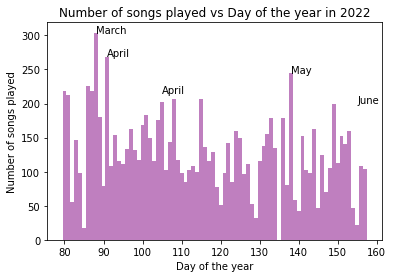

In [334]:
plt.bar(days.Days, height = days.Count, width = 1, color = "purple", alpha = 0.5)
plt.title("Number of songs played vs Day of the year in 2022")
plt.xlabel("Day of the year")
plt.ylabel("Number of songs played")
plt.text(88, 304, "March")
plt.text(91, 269, "April")
plt.text(138, 245, "May")
plt.text(105, 215, "April")
plt.text(155, 200, "June")
plt.show()

Between Feb and July in 2022 my music engagement peaked in March and I am not quite sure why that is. Probaly because of the spring break. I had more time on my hands to explore new genres and in April my engagement decreased of which I suspect was due to the increasing school workload. I don't do well with listening to music and studying at the same time. That said, my engagement should have increased in June because summer had begun.